In [1]:
# Importing all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix 
import pickle

In [2]:
# loading the dataset of room occupancy
occupancy_dataset= pd.read_csv('C:\\Users\\JAYVIR CHHASATIYA\\Desktop\\Data science\\case-study-june-2022 (1)\\data\\occupancy.csv')

In [6]:
# printing first five rows of dataset
occupancy_dataset.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
# number of rows and columns in dataset
occupancy_dataset.shape

(20560, 7)

In [8]:
# printing number of room occupied and not occupied outcomes
occupancy_dataset['Occupancy'].value_counts()

0    15810
1     4750
Name: Occupancy, dtype: int64

In [9]:
# getting information of dataset
occupancy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [10]:
# checking any negative values present or not
occupancy_dataset[occupancy_dataset['Temperature']<0].sum()
occupancy_dataset[occupancy_dataset['Humidity']<0].sum()
occupancy_dataset[occupancy_dataset['Light']<0].sum()
occupancy_dataset[occupancy_dataset['CO2']<0].sum()
occupancy_dataset[occupancy_dataset['HumidityRatio']<0].sum()

date             0.0
Temperature      0.0
Humidity         0.0
Light            0.0
CO2              0.0
HumidityRatio    0.0
Occupancy        0.0
dtype: float64

<BarContainer object of 20560 artists>

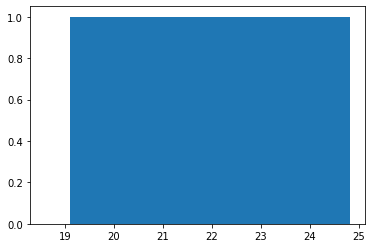

In [11]:
# plotting the graph of all the features for data analysis
plt.bar(occupancy_dataset['Temperature'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

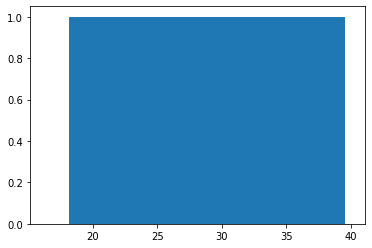

In [12]:
plt.bar(occupancy_dataset['Humidity'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

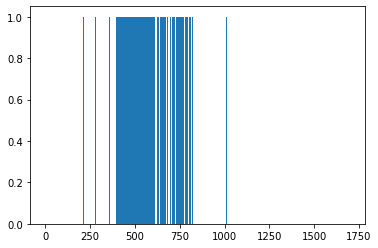

In [13]:
plt.bar(occupancy_dataset['Light'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

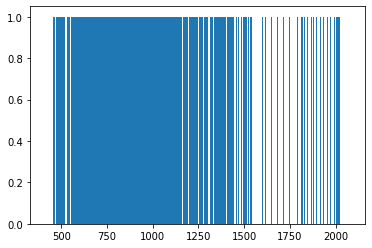

In [14]:
plt.bar(occupancy_dataset['CO2'],occupancy_dataset['Occupancy'])

<BarContainer object of 20560 artists>

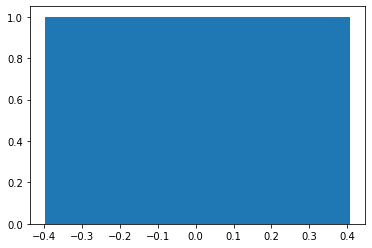

In [15]:
plt.bar(occupancy_dataset['HumidityRatio'],occupancy_dataset['Occupancy'])

<AxesSubplot:>

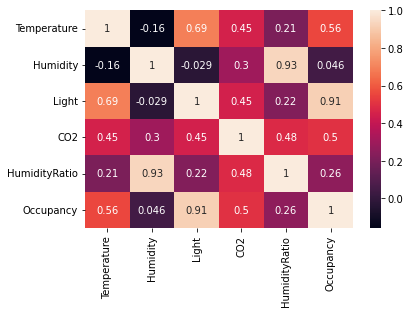

In [16]:
# heatmap of dataset to know correlation between all features
sns.heatmap(occupancy_dataset.corr(), annot=True)

In [17]:
# calculating mean 
occupancy_dataset.groupby('Occupancy').mean()

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupancy,,,,,
0,20.584830,27.529654,25.237893,604.996614,0.004120
1,21.975909,28.076209,481.967380,975.321870,0.004589


In [18]:
# getting satistical analysis of data
occupancy_dataset.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [3]:
# seperating the data and labels
X = occupancy_dataset.drop(['Occupancy','date','HumidityRatio'],axis=1) #indepedent variables
Y = occupancy_dataset['Occupancy'] # dependent variables

In [4]:
# train test split function 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [5]:
# shape of X_test and X_train
print(X.shape, X_train.shape, X_test.shape)

(20560, 4) (16448, 4) (4112, 4)


In [7]:
# model using svm algorithm
pipeline_svm=Pipeline([('scalar1',StandardScaler()),
('pca1',PCA(0.95)),
('svm_classifier',svm.SVC(kernel= 'linear'))])


In [8]:
# model using logistic regression algorithm
pipeline_lr=Pipeline([('scalar2',StandardScaler()),
('pca2',PCA(0.95)),
('lr_classifier',LogisticRegression())])

In [9]:
# model using random forest classifier algorithm
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
('pca3',PCA(0.95)),
('rf_classifier',RandomForestClassifier())])

In [10]:
# the list of pipelines
pipelines = [pipeline_svm, pipeline_lr, pipeline_rf]

In [11]:
# declaring the variables
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [12]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'SVM', 1: 'Logistic Regression', 2: 'RandomForest'}
# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, Y_train)

In [13]:
# declaring prediction variables	
prediction_of_test_svm= pipeline_svm.predict(X_test)
prediction_of_test_lr= pipeline_lr.predict(X_test)
prediction_of_test_rf= pipeline_rf.predict(X_test)

In [14]:
# printing test accuracy

for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,Y_test)))
print(" Test Accuracy: ",(prediction_of_test_svm))
print(" Test Accuracy: ",(prediction_of_test_lr))
print(" Test Accuracy:",(prediction_of_test_rf))

SVM Test Accuracy: 0.9861381322957199
Logistic Regression Test Accuracy: 0.9861381322957199
RandomForest Test Accuracy: 0.9919747081712063
 Test Accuracy:  [0 0 0 ... 0 1 0]
 Test Accuracy:  [0 0 0 ... 0 1 0]
 Test Accuracy: [0 0 0 ... 0 1 0]


In [15]:
# selecting the best model
for i,model in enumerate(pipelines):
    if model.score(X_test,Y_test)>best_accuracy:
        best_accuracy=model.score(X_test,Y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: RandomForest


In [17]:
# seperating test splitted dataset
X_test['Occupancy']= Y_test
X_test.to_csv('C:\\Users\\JAYVIR CHHASATIYA\\Desktop\\Data science\\case-study-june-2022 (1)\\data\\occupancy.csv')

Confusion Matrix of SVM(support vector machine:


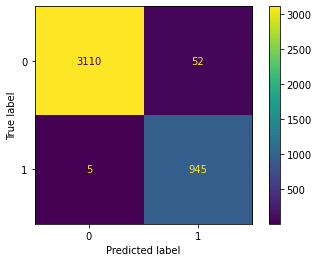

In [18]:
print("Confusion Matrix of SVM(support vector machine:")
con_mat = confusion_matrix(y_true=Y_test, y_pred=prediction_of_test_svm)

ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=prediction_of_test_svm)

Confusion Matrix of Logistic Regression


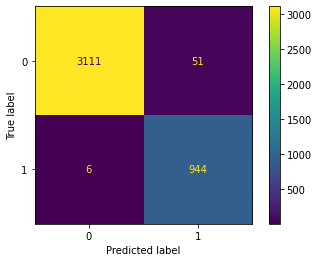

In [19]:
print("Confusion Matrix of Logistic Regression")
con_mat = confusion_matrix(y_true=Y_test, y_pred=prediction_of_test_lr)

ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=prediction_of_test_lr)

Confusion Matrix of Random Forest Classifier


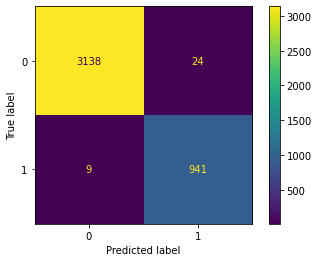

In [20]:
print("Confusion Matrix of Random Forest Classifier")
con_mat = confusion_matrix(y_true=Y_test, y_pred=prediction_of_test_rf)

ConfusionMatrixDisplay.from_predictions(y_true=Y_test, y_pred=prediction_of_test_rf)

In [21]:
svm_report = classification_report(Y_test,prediction_of_test_svm)
print(svm_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3162
           1       0.95      0.99      0.97       950

    accuracy                           0.99      4112
   macro avg       0.97      0.99      0.98      4112
weighted avg       0.99      0.99      0.99      4112



In [22]:
lr_report = classification_report(Y_test,prediction_of_test_lr)
print(lr_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3162
           1       0.95      0.99      0.97       950

    accuracy                           0.99      4112
   macro avg       0.97      0.99      0.98      4112
weighted avg       0.99      0.99      0.99      4112



In [23]:
rf_report = classification_report(Y_test,prediction_of_test_rf)
print(rf_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3162
           1       0.98      0.99      0.98       950

    accuracy                           0.99      4112
   macro avg       0.99      0.99      0.99      4112
weighted avg       0.99      0.99      0.99      4112



In [27]:
# export
pickle.dump(pipeline_rf,open('pipe.pkl','wb'))
